In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
data = pd.read_csv('IPL Player Stats - 2016 till 2019.csv')

In [ ]:
data.head()


In [ ]:
data.info()

In [6]:
ipl = pd.read_csv('0y clean data pre ipl.csv')

In [7]:
ipl.head()


Unnamed: 0  match_id                  venue  innings  ball  \
0           0    335982  M Chinnaswamy Stadium        1   0.1   
1           1    335982  M Chinnaswamy Stadium        1   0.2   
2           2    335982  M Chinnaswamy Stadium        1   0.3   
3           3    335982  M Chinnaswamy Stadium        1   0.4   
4           4    335982  M Chinnaswamy Stadium        1   0.5   

            batting_team                 bowling_team      striker  \
0  Kolkata Knight Riders  Royal Challengers Bangalore   SC Ganguly   
1  Kolkata Knight Riders  Royal Challengers Bangalore  BB McCullum   
2  Kolkata Knight Riders  Royal Challengers Bangalore  BB McCullum   
3  Kolkata Knight Riders  Royal Challengers Bangalore  BB McCullum   
4  Kolkata Knight Riders  Royal Challengers Bangalore  BB McCullum   

   non_striker   bowler  runs_off_bat  extras wicket_type player_dismissed  \
0  BB McCullum  P Kumar           0.0     1.0                                
1   SC Ganguly  P Kumar           0.0     0.0                                
2   SC Ganguly  P Kumar           0.0     1.0                                
3   SC Ganguly  P Kumar           0.0     0.0                                
4   SC Ganguly  P Kumar           0.0     0.0                                

   run  wickets  truns     y  
0  1.0      0.0    1.0  68.0  
1  0.0      0.0    1.0  68.0  
2  1.0      0.0    2.0  68.0  
3  0.0      0.0    2.0  68.0  
4  0.0      0.0    2.0  68.0

In [8]:
data['Player'].unique().shape

(268,)

In [9]:
ipl['striker'].unique().shape

(162,)

In [10]:
new_ipl = pd.merge(ipl,data,left_on='striker',right_on='Player')

In [11]:
new_ipl.drop(['wicket_type', 'player_dismissed','Unnamed: 0','match_id'],axis=1,inplace=True)

In [ ]:
new_ipl.head()

In [ ]:
new_ipl.columns

In [ ]:
listf = []
for c in new_ipl.columns:
    if new_ipl[c].dtype==object:
        print(c,"->" ,new_ipl[c].dtype)
        listf.append(c)

In [ ]:
def labelEncoding(data):
    dataset = pd.DataFrame(new_ipl)
    feature_dict ={}
    #features={}
    for feature in dataset:
        if dataset[feature].dtype==object:
            le = preprocessing.LabelEncoder()
            fs = dataset[feature].unique()
            le.fit(fs)
            dataset[feature] = le.transform(dataset[feature])
            feature_dict[feature] = le
            print(feature)
    return dataset

labelEncoding(new_ipl)

In [16]:
X = new_ipl.drop('y',axis=1).values
y = new_ipl['y'].values

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
# Scaling the data using MinMaxScaler which is important when we deal with neural nets

scaler = MinMaxScaler()

In [21]:
X_train = scaler.fit_transform(X_train)

In [22]:
# Can't fit the X_test because it should not be scaled as it is to be predicted

X_test = scaler.transform(X_test)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [24]:
X_train.shape

(14409, 42)

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
# Early stopping is done to avoid overfitting.
# Previous I did the prediction without using early stopping and it gave a really bad score!
# What early stopping basically does is, it stops calculating the losses when 'val_loss' increases than 'loss'. Val_loss curve
# should always be below val curve.

early_stop = EarlyStopping(monitor='val_loss',patience=25,verbose=1, mode='min',)

In [27]:
model = Sequential()

model.add(Dense(43, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(22, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(11, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
# used loss=mse(mean squared error) because it a regression task.

In [28]:
model.fit(x=X_train, y=y_train, epochs=400, validation_data=(X_test,y_test),callbacks=[early_stop] )

Epoch 1/400
451/451 [==============================] - 3s 3ms/step - loss: 1029.6061 - val_loss: 324.9128
Epoch 2/400
451/451 [==============================] - 1s 2ms/step - loss: 634.9025 - val_loss: 223.0571
Epoch 3/400
451/451 [==============================] - 1s 3ms/step - loss: 589.0392 - val_loss: 141.5495
Epoch 4/400
451/451 [==============================] - 1s 2ms/step - loss: 549.4503 - val_loss: 210.7104
Epoch 5/400
451/451 [==============================] - 2s 4ms/step - loss: 511.5534 - val_loss: 142.8612
Epoch 6/400
451/451 [==============================] - 2s 4ms/step - loss: 451.0422 - val_loss: 116.4715
Epoch 7/400
451/451 [==============================] - 1s 2ms/step - loss: 439.9395 - val_loss: 122.4436
Epoch 8/400
451/451 [==============================] - 1s 3ms/step - loss: 425.9634 - val_loss: 112.7742
Epoch 9/400
451/451 [==============================] - 1s 2ms/step - loss: 405.1451 - val_loss: 101.8493
Epoch 10/400
451/451 [==============================] 

In [29]:
model_losses = pd.DataFrame(model.history.history)

<Axes: >

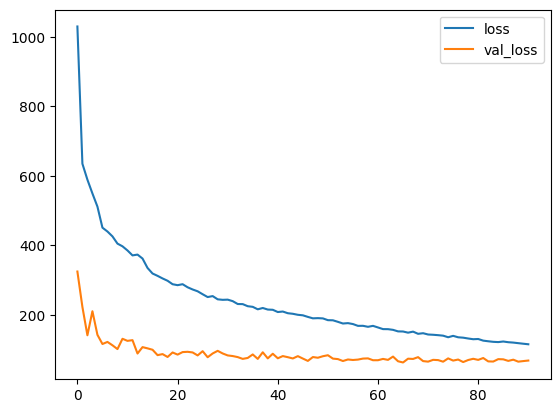

In [30]:
model_losses.plot()

In [31]:
predictions = model.predict(X_test)

222/222 [==============================] - 1s 2ms/step


In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score

In [33]:
mean_absolute_error(y_test,predictions)
# Mean absolute error regression loss

6.425978563966358

In [34]:
np.sqrt(mean_squared_error(y_test,predictions))
# Mean squared error regression loss.

8.300356199712938

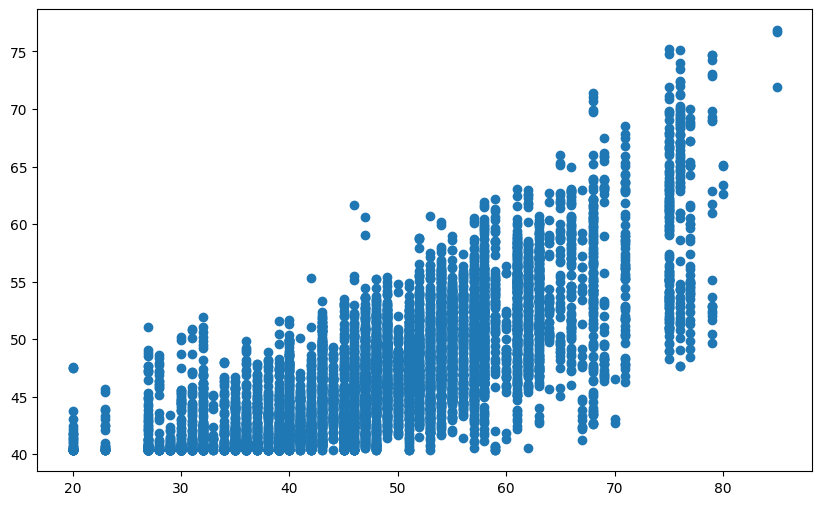

In [35]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,predictions)

In [36]:
sample = pd.DataFrame(predictions,columns=['Predict'])
sample['Actual']=y_test

In [37]:
sample.head(10)

Predict  Actual
0  46.897720    53.0
1  52.795467    53.0
2  45.685581    56.0
3  52.022449    62.0
4  40.478191    23.0
5  43.391754    45.0
6  56.006268    63.0
7  44.925140    49.0
8  51.032337    54.0
9  52.726936    54.0

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Predict'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['Actual'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_2, *['Predict'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['Actual'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_4, *[[['Predict', 'Actual']]], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_5, *['Predict'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_6, *['Actual'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['Predict'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_8, *['Actual'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_9, *[[['Predict', 'Actual']]], **{})
chart

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
